# 9. Stochastic Methods

Some computations involve random numbers, such as simulating stochastic processes or searching in a high dimension space. 

References:
* Christopher M. Bishop: Pattern Recognition and Machine Learning, Chapter 11: Sampling methods. Springer, 2006.
* Jun S. Liu: Monte Carlo Strategies in Scientific Computing. Springer, 2004.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Random Numbers
How can we generate *random* numbers from deterministic digital computers? They are, of course, *pseudo* random numbers.

The classic way of generating pseudo random numbers is *Linear Congruent Method* using a sequential dynimcs:  
$$ x_{i+1}=ax_i+b \mod m. $$
Below is what was long used in the Unix system.

In [2]:
def lcm(n=1, seed=-1726662223):
    """Random integers <2**31 by linear congruent method"""
    a = 1103515245
    b = 12345
    c = 0x7fffffff  # 2**31 - 1
    x = np.zeros(n+1, dtype=int)
    x[0] = seed
    for i in range(n):
        x[i+1] = (a*x[i] + b) & c  # bit-wise and
    return(x[1:])

In [3]:
x = lcm(1000)

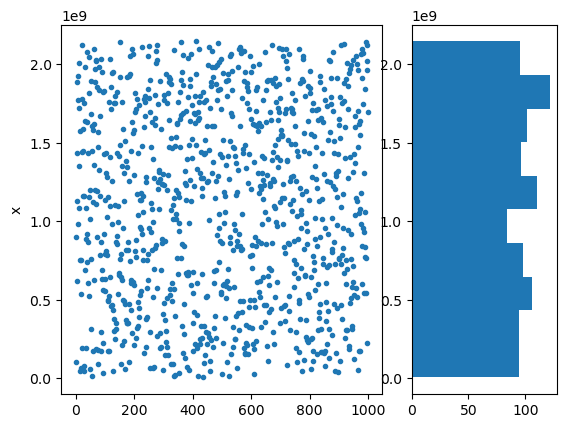

In [4]:
plt.subplot(1, 3, (1,2))
plt.plot(x, '.')
plt.ylabel('x')
plt.subplot(1, 3, 3)
plt.hist(x, orientation='horizontal');

A common problem with LCM is that lower digits can fall in simple cycles.

In [5]:
x[:100]%4

array([2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1])

Also the samples can form crystal-like structure when consecutive numbers are taken as a vector.

`numpy.random` uses an advanced method called *Mersenne Twister* which overcomes these problems.

In [6]:
x = np.random.randint(2**31, size=1000)

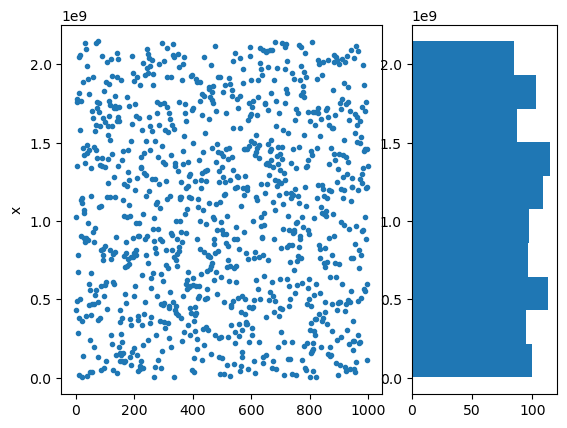

In [7]:
plt.subplot(1, 3, (1,2))
plt.plot(x, '.')
plt.ylabel('x')
plt.subplot(1, 3, 3)
plt.hist(x, orientation='horizontal');

In [8]:
x[:100]%4

array([2, 1, 0, 3, 0, 0, 2, 0, 2, 1, 2, 0, 3, 0, 0, 2, 1, 3, 1, 2, 3, 2,
       1, 1, 3, 3, 0, 0, 0, 0, 3, 1, 2, 2, 0, 3, 0, 2, 3, 1, 1, 1, 1, 2,
       3, 0, 1, 0, 2, 1, 3, 2, 2, 1, 1, 1, 2, 3, 0, 3, 3, 1, 2, 2, 3, 2,
       2, 3, 0, 2, 0, 1, 2, 2, 1, 3, 0, 0, 3, 1, 1, 1, 0, 2, 2, 0, 0, 1,
       2, 0, 0, 1, 3, 2, 1, 3, 2, 2, 2, 1])

## Integrating area/volume
Uniform random numbers can be used to approximate integration
$$ \int_V f(x)dx \simeq \frac{|V|}{n}\sum_{i=1}^n f(x_i) $$
by uniform samples $x_i$ in a volume $V$

For example, let us evaluate a volume of a sphere.

In [9]:
# Sphere in 3D
def sphere(x):
    """height of a half sphere"""
    h2 = 1 - x[0]**2 - x[1]**2
    return np.sqrt((h2>0)*h2)

In [10]:
m = 10000
x = np.random.random((2, m)) # one quadrant
v = np.sum(sphere(x))/m
print(8*v)
print(4/3*np.pi)

4.186632147181075
4.1887902047863905


Let us evaluate the volume of n-dimension sphere, which is supposed to be
$ \frac{\pi^{n/2}}{\Gamma(n/2-1)} $

In [11]:
from scipy.special import gamma

In [12]:
# n-dimensional sphere
def nsphere(x):
    """height of a half sphere in n-dim"""
    h2 = 1 - np.sum(x**2, axis=0)
    return np.sqrt((h2>0)*h2)

In [13]:
m = 10000
for n in range(2,20):
    x = np.random.random((n-1, m)) # one quadrant
    v = np.sum(nsphere(x))/m
    print(n, 2**n*v, np.pi**(n/2)/gamma(n/2+1))

2 3.138551676665442 3.141592653589793
3 4.185736885980518 4.188790204786391
4 4.994879997092956 4.934802200544679
5 5.2787967548627615 5.263789013914324
6 5.255995173314304 5.167712780049969
7 5.109197194676637 4.724765970331401
8 3.784452652036485 4.058712126416768
9 3.572358824180159 3.2985089027387064
10 2.0070113956331177 2.550164039877345
11 1.8462734178256892 1.8841038793898999
12 0.3563567411628886 1.3352627688545893
13 0.449114384811362 0.9106287547832829
14 0.33592436497820494 0.5992645293207919
15 0.0 0.38144328082330436
16 0.0 0.23533063035889312
17 0.0 0.140981106917139
18 0.0 0.08214588661112819
19 0.0 0.04662160103008853


## Non-uniform Distributions
How can we generate samples following a non-uniform distribution $p(x)$?

If the cumulative density function $f(x) = \int_{-\infty}^{x} p(u) du$ is known, we can map uniformly distributed samples $y_i\in[0,1]$ to $x_i = f^{-1}(y_i)$.

### Exponential distribution
$$ p(x;\mu) = \frac{1}{\mu}e^{-\frac{x}{\mu}} $$
$$ f(x;\mu) = 1 - e^{-\frac{x}{\mu}} $$

In [14]:
# Exponential distribution in [0,infinity)
def p_exp(x, mu=1):
    """density function of exponential distribution"""
    return np.exp(-x/mu)/mu

def f_exp(x, mu=1):
    """cumulative density function of exponential distribution"""
    return 1 - np.exp(-x/mu)

def finv_exp(y, mu=1):
    """inverse of cumulative density function of exponential distribution"""
    return -mu*np.log(1 - y)

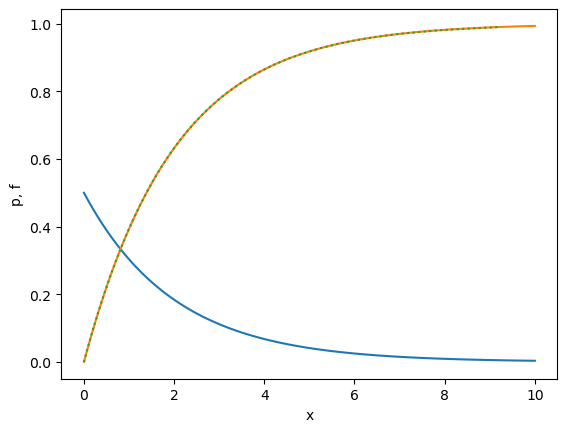

In [15]:
x = np.linspace(0, 10, 100)
plt.plot(x, p_exp(x, 2))
plt.plot(x, f_exp(x, 2))
y = np.arange(0, 1, 0.01)
plt.plot(finv_exp(y, 2), y, ':')
plt.xlabel('x'); plt.ylabel('p, f');

In [16]:
def x_exp(n=1, mu=1):
    """sample from exponential distribution"""
    ys = np.random.random(n)  # uniform in [0,1]
    return finv_exp(ys, mu)

In [17]:
x_exp(10, 2)

array([ 0.20435683, 16.93045084,  5.46393036,  1.90611343,  2.060477  ,
        2.34353003,  6.46544076,  5.40272458,  2.09439886,  0.12841252])

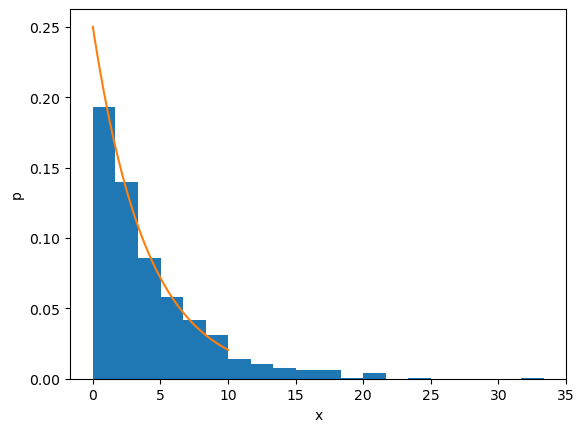

In [18]:
xs = x_exp(1000, 4)
plt.hist(xs, bins=20, density=True)
plt.plot(x, p_exp(x, 4))
plt.xlabel('x'); plt.ylabel('p');

When a stochastic variable $x$ following the distribution $p(x)$ is transformed by $y=g(x)$, the distribution of $y$ is given by 
$$p(y) = \left|\frac{\partial x}{\partial y}\right|p(x)$$
where $|\,|$ means the absolute value for a scalar derivative and the determinant for a Jacobian matrix.

### Normal distribution
A common way of generating a normal (Gaussian) distribution
$$ p(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2} $$
is to consider a 2D normal distribution
$$ p(x_1,x_2) = p(x_1)p(x_2) = \frac{1}{2\pi}e^{-\frac{1}{2}(x_1^2+x_2^2)}. $$
For a polar coordinate tranformation
$$ x_1 = r\cos\theta $$
$$ x_2 = r\sin\theta, $$
the Jacobian is 
$$ \frac{\partial (x_1,x_2)}{\partial (r,\theta)} = 
        \left(\begin{array}{cc} \cos\theta & -r\sin\theta\\
        \sin\theta & r\cos\theta\end{array}\right)$$
and its determinant is
$$ \det\frac{\partial (x_1,x_2)}{\partial (r,\theta)} = 
        r\cos^2\theta + r\sin^2\theta = r. $$
Thus we have the relationship
$$ p(r,\theta) = r p(x_1,x_2) = \frac{r}{2\pi} e^{−\frac{r^2}{2}}. $$
By further transforming $u=r^2$, from $\frac{du}{dr}= 2r$, we have 
$$ p(u,\theta) = \frac{1}{2r}p(r,\theta) = \frac{1}{4\pi} e^{−\frac{u}{2}}.$$

Thus we can sample $u$ by exponential distribution $p(u)=\frac{1}{2} e^{−\frac{u}{2}}$ and $\theta$ by uniform distribution in $[0,2\pi)$, and then transform them to $x_1$ and $x_2$ to generate two samples following normal distribution. 

This is known as Box-Muller method.

In [19]:
def box_muller(n=1):
    """Generate 2n gaussian samples"""
    u = x_exp(n, 2)
    r = np.sqrt(u)
    theta = 2*np.pi*np.random.random(n)
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    return np.hstack((x1,x2))

In [20]:
box_muller(1)

array([ 0.56922277, -0.17458328])

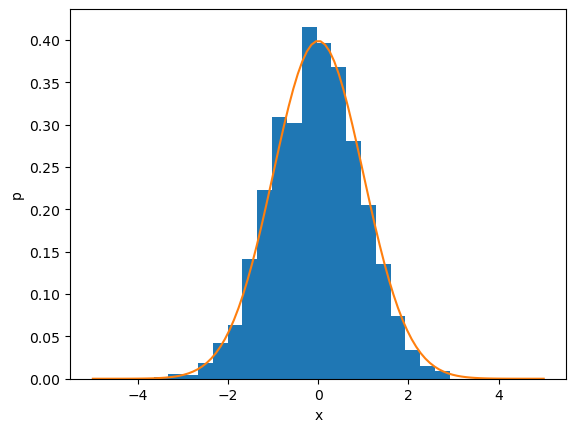

In [21]:
xs = box_muller(1000)
plt.hist(xs, bins=20, density=True)
# check how the histogram fits the pdf
x = np.linspace(-5, 5, 100)
px = np.exp(-x**2/2)/np.sqrt(2*np.pi)
plt.plot(x, px)
plt.xlabel('x'); plt.ylabel('p');

In practice, you can sample by the whole variety of distributions in numpy.random package, but it's good to know the principle.

In [22]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------

## Rejection Sampling
What can we do when transformations from uniform distribution is not available?  

Let us find a *proposal distribution* $q(x)$ for which samples are easily generated and covers the target distribution as $p(x)\le cq(x)$ with a scaling constant $c>0$.  
Then take a sample from $q(x)$ and accept it with probability $\frac{p(x)}{cq(x)}$.

### Gamma distribution
*Gamma distribution* is an extension of exponential distribution defined as
$$ p(x; k, \theta) = \frac{1}{\Gamma(k)\theta^k}x^{k-1}e^{-\frac{x}{\theta}} $$
with the shape parameter $k>0$ and the scaling parameter $\theta$. 

$\Gamma(k)$ is the *gamma function*, which is a generalization of factorial, $\Gamma(k)=(k-1)!$ for an integer $k$. 

Let us generate samples from gamma distribution with integer $k$ and $\theta=1$.

In [23]:
def p_gamma(x, k=1):
    """gamma distribution with integer k"""
    return x**(k-1)*np.exp(-x)/np.prod(range(1,k))

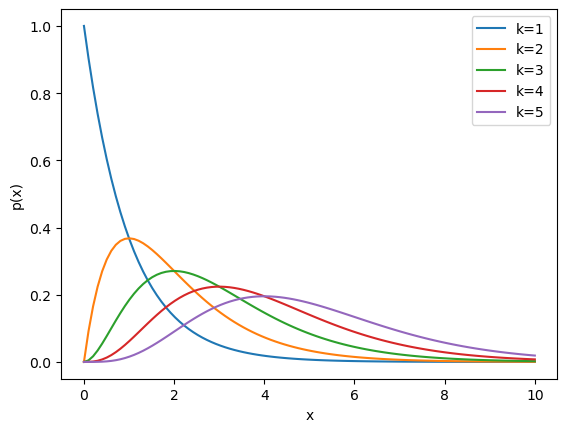

In [24]:
x = np.linspace(0, 10, 100)
for k in range(1, 6):
    plt.plot(x, p_gamma(x, k), label='k={}'.format(k))
plt.xlabel('x'); plt.ylabel('p(x)'); plt.legend();

Consider the exponential distribution $q(x;\mu)=\frac{1}{\mu}e^{-\frac{x}{\mu}}$ as the proposal distribution.  
For
$$ \frac{p(x;k)}{q(x;\mu)} = \frac{\mu}{(k-1)!}x^{k-1}e^{-(1-\frac{1}{\mu})x}, $$
we set
$$ \frac{d}{dx}\frac{p(x;k)}{q(x;\mu)} = 0 $$
and have
$$ \left((k-1)x^{k-2}+\frac{1-\mu}{\mu}x^{k-1}\right)e^{\frac{1-\mu}{\mu}x} = 0, $$
$$ x = \frac{\mu(k-1)}{\mu-1}, $$
where $\frac{p(x;k)}{q(x;\mu)}$ takes the maximum
$$ \frac{\mu^k}{(k-1)!}\left(\frac{k-1}{\mu-1}\right)^{k-1}e^{1-k}. $$
By taking $\mu=k$, 
$$ c=\frac{k^k}{(k-1)!}e^{1-k} $$
satisfies $p(x)\le cq(x)$

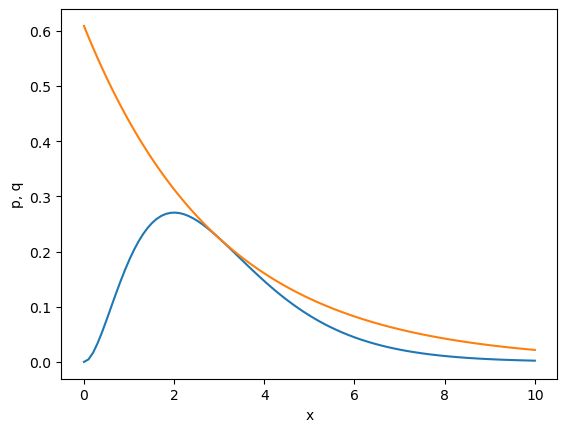

In [25]:
k = 3
c = (k**k)/np.prod(range(1,k))*np.exp(1-k)
#print(c)
x = np.linspace(0, 10, 100)
plt.plot(x, p_gamma(x, k))
plt.plot(x, c*p_exp(x, k))
plt.xlabel('x'); plt.ylabel('p, q');

In [26]:
def x_gamma(n=10, k=1):
    """sample from gamma distribution by rejection sampling"""
    c = (k**k)/np.prod(range(1,k))*np.exp(1-k)
    xe = x_exp(n, k)
    paccept = p_gamma(xe, k)/(c*p_exp(xe, k))
    accept = np.random.random(n)<paccept
    xg = xe[accept]  # rejection sampling
    #print("c =", c, "; acceptance rate =", len(xg)/n)
    return xg

accept: 551


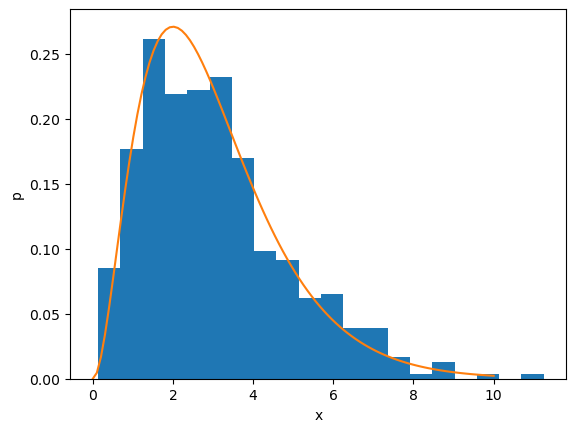

In [27]:
k = 3
xs = x_gamma(1000, k)
print('accept:', len(xs))
plt.hist(xs, bins=20, density=True)
plt.plot(x, p_gamma(x, k))
plt.xlabel('x'); plt.ylabel('p');

## Importance Sampling
One probelm of rejection sampling is that we may end up rejecting many of the samples when we cannot find a good proposal distribution.

When the aim is not just to take samples from $p(x)$ but to take 
the *expectation* of a function $h(x)$ with respect to the distribution $p(x)$
$$ E_p[h(x)] = \int h(x)p(x)dx, $$
we can use the ratio between the target and proposal distributions to better utilize the samples.

$$ E_p[h(x)] = \int h(x)p(x)dx = \int h(x)\frac{p(x)}{q(x)}q(x)dx
    = E_q\left[\frac{p(x)}{q(x)}h(x)\right] $$



### Mean and variance
Let us consider taking the mean
$$ \mu = E_p[x] = \int xp(x)dx $$
and the variance
$$ \sigma^2 = E_p[(x-\mu)^2] = \int (x-\mu)^2p(x)dx  $$
for the gamma distribution, which are known to be $k\theta$ and $k\theta^2$, respectively.

In [28]:
def mv_exp(n=1, mu=1):
    """mean and variance of exponential distribution"""
    x = x_exp(n, mu)
    mean = np.mean(x)
    var = np.var(x)
    return (mean, var)

In [29]:
mv_exp(1000, 3)

(3.0344683119908513, 8.957923734860142)

In [30]:
def mv_gamma(n=1, k=1):
    """mean and variance of gamma distribution by rejection sampling"""
    x = x_gamma(n, k)  # by rejection sampling
    mean = np.mean(x)
    var = np.var(x)
    return (mean, var)

In [31]:
mv_gamma(100, 3)

(2.715452007977214, 1.8935600535239674)

In [32]:
def mv_gamma_is(n=1, k=1):
    """mean and variance of gamma distribution by importance sampling"""
    x = x_exp(n, k)  # sample by exponential distribution
    importance = p_gamma(x, k)/p_exp(x, k)
    mean = np.dot(importance, x)/n
    var = np.dot(importance, (x-mean)**2)/(n - 1)
    return (mean, var)

In [33]:
mv_gamma_is(1000, 3)

(3.01443561772641, 3.0433399662357035)

Compare the variability of the estimate of the mean.

In [34]:
m = 100  # number of runs
n = 100  # number of samples
k = 3
means = np.zeros((m, 2))
for i in range(m):
    means[i,0], var = mv_gamma(n, k)
    means[i,1], var = mv_gamma_is(n, k)
print("RS: ", np.mean(means[:,0]), np.var(means[:,0]))
print("IS: ", np.mean(means[:,1]), np.var(means[:,1]))

RS:  3.021025041844551 0.06887651836534543
IS:  2.99676139988348 0.05064515188923128


## Markov Chain Monte Carlo (MCMC)
What if we don't know the right proposal distribution? We can take a nearby point of a previous sample as a candidate sample and keep it if the candidate's probability is high. The method is callel Markov Chain Monte Carlo (MCMC) method and used practically for sampling from unknow distributions in high dimensional space.

### Metropolis Sampling
A simple example of MCMC is Metropolis sampling, which requires only unnormalized propability $\tilde{p}(x)\propto p(x)$ of samples for relative comparison.

A new candidate $x^*$ is generated by a symmetric proposal distribution $q(x^*|x_k)=q(x_k|x^*)$, such as a gaussian distribution, and acctepted with the probability of
$$ p_\mbox{acc} = \min(1, \frac{p(x^*)}{p(x_k)}) $$ 

In [35]:
def metropolis(p, x0, sig=0.1, m=1000):
    """metropolis: Metropolis sampling
    p:unnormalized probability, x0:initial point,
    sif:sd of proposal distribution, m:number of sampling"""
    n = len(x0)  # dimension
    p0 = p(x0)
    x = []
    for i in range(m):
        x1 = x0 + sig*np.random.randn(n)
        p1 = p(x1)
        pacc = min(1, p1/p0)
        if np.random.rand()<pacc:
            x.append(x1)
            x0 = x1
            p0 = p1
    return np.array(x)

In [36]:
def croissant(x):
    """croissant-like distribution in 2D"""
    return np.exp(-x[0]**2 - (x[1]-x[0]**2)**2)

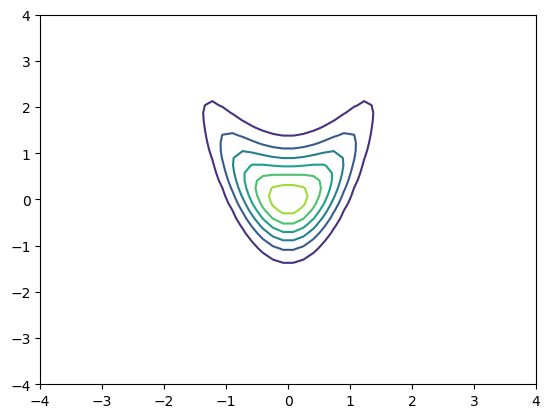

In [37]:
r = 4  # plot rage
x = np.linspace(-r, r)
X, Y = np.meshgrid(x, x)
Z = croissant(np.array([X,Y]))
plt.contour(X, Y, Z);

948


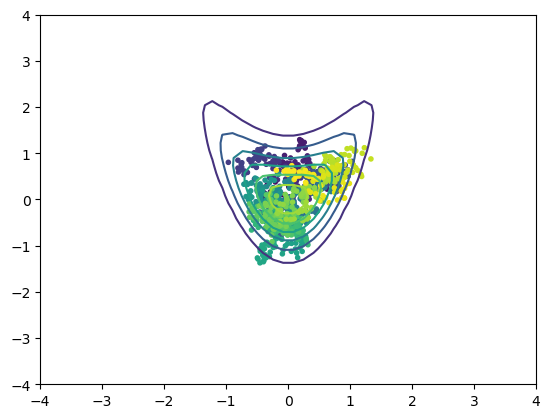

In [38]:
x = metropolis(croissant, [0,0])
s = len(x); print(s)
plt.contour(X, Y, Z)
plt.scatter(x[:,0], x[:,1], c=np.arange(s), marker='.');

904


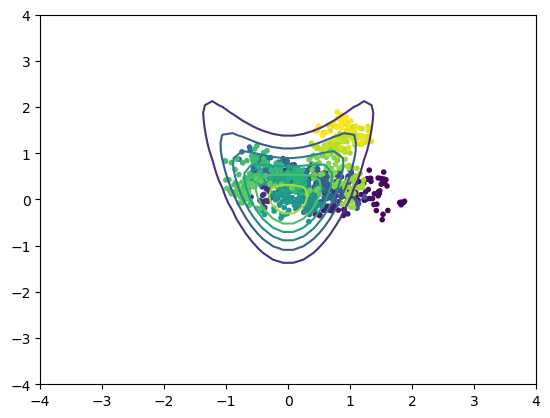

In [39]:
x = metropolis(croissant, [2,0], sig=0.1, m=1000)
s = len(x); print(s)
plt.contour(X, Y, Z)
plt.scatter(x[:,0], x[:,1], c=np.arange(s), marker='.');